### import necessaries libraries

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
from datetime import datetime
from keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Give dataset path
train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/test'

Working with 1440 images
Image examples: 
1491.jpg


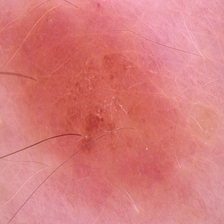

1678.jpg


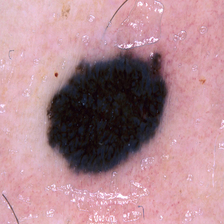

166.jpg


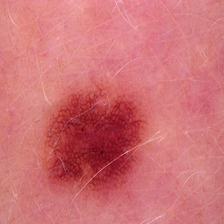

1528.jpg


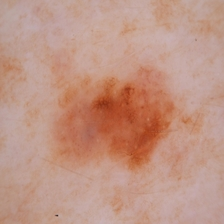

167.jpg


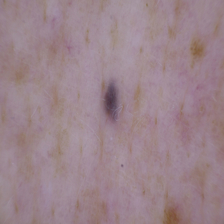

1442.jpg


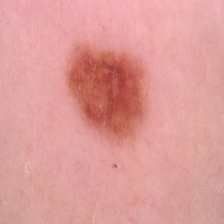

1649.jpg


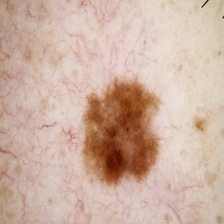

1425.jpg


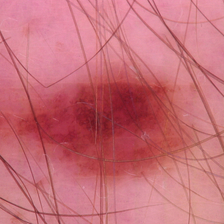

1633.jpg


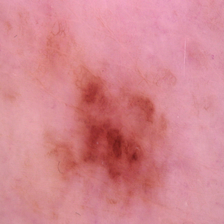

1707.jpg


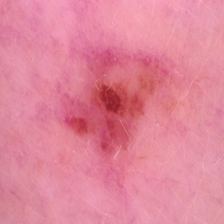

In [6]:
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob('/content/drive/MyDrive/train/*')
print(len(folders))

2


In [11]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [14]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [17]:
checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10



Epoch 1: val_loss improved from inf to 1.67180, saving model to mymodel.h5
5/5 - 478s - loss: 3.0618 - accuracy: 0.6562 - val_loss: 1.6718 - val_accuracy: 0.8015 - 478s/epoch - 96s/step
Epoch 2/10


5/5 - 95s - loss: 1.5826 - accuracy: 0.8125 - 95s/epoch - 19s/step
Epoch 3/10


5/5 - 92s - loss: 1.7265 - accuracy: 0.8250 - 92s/epoch - 18s/step
Epoch 4/10


5/5 - 94s - loss: 1.9499 - accuracy: 0.8000 - 94s/epoch - 19s/step
Epoch 5/10


5/5 - 93s - loss: 2.3725 - accuracy: 0.7625 - 93s/epoch - 19s/step
Epoch 6/10


5/5 - 90s - loss: 1.8483 - accuracy: 0.8438 - 90s/epoch - 18s/step
Epoch 7/10


5/5 - 80s - loss: 1.7457 - accuracy: 0.7801 - 80s/epoch - 16s/step
Epoch 8/10


5/5 - 94s - loss: 1.7319 - accuracy: 0.8000 - 94s/epoch - 19s/step
Epoch 9/10


5/5 - 93s - loss: 1.3170 - accuracy: 0.8250 - 93s/epoch - 19s/step
Epoch 10/10


5/5 - 90s - loss: 1.3590 - accuracy: 0.8125 - 90s/epoch - 18s/step
Training completed in time:  0:25:22.305898


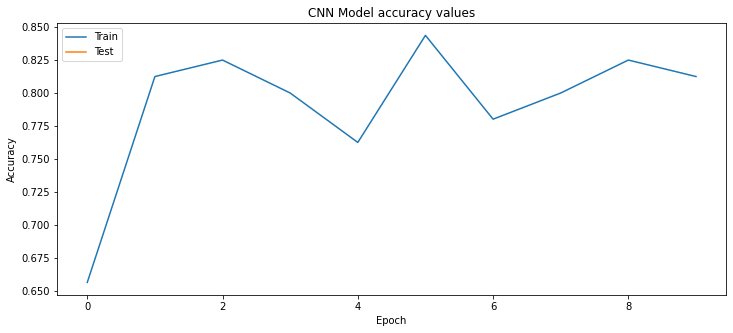

In [25]:
# Plot training & validation loss values
plt.figure(figsize=(12,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()